In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_CSV = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/Walmart/train.csv")
features_CSV = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/Walmart/features.csv")
store_csv = pd.read_csv("C:/Users/samue/Downloads/Prep/Kaggles/Walmart/stores.csv")

In [3]:
train_CSV.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
store_csv.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [18]:
features_CSV.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
features_cleaned = features_CSV.copy()
features_cleaned["CPI"]=features_cleaned["CPI"].ffill()
features_cleaned["Unemployment"]=features_cleaned["Unemployment"].ffill()
features_cleaned=features_cleaned.fillna(0)


In [15]:
nullCounts = features_cleaned.isnull().sum()
nullCounts

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [61]:
training_df = train_CSV.merge(features_cleaned.drop(columns = ["IsHoliday"]),on=["Store","Date"],how="left").merge(store_csv,on = ["Store"], how = "left")

In [24]:
training_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


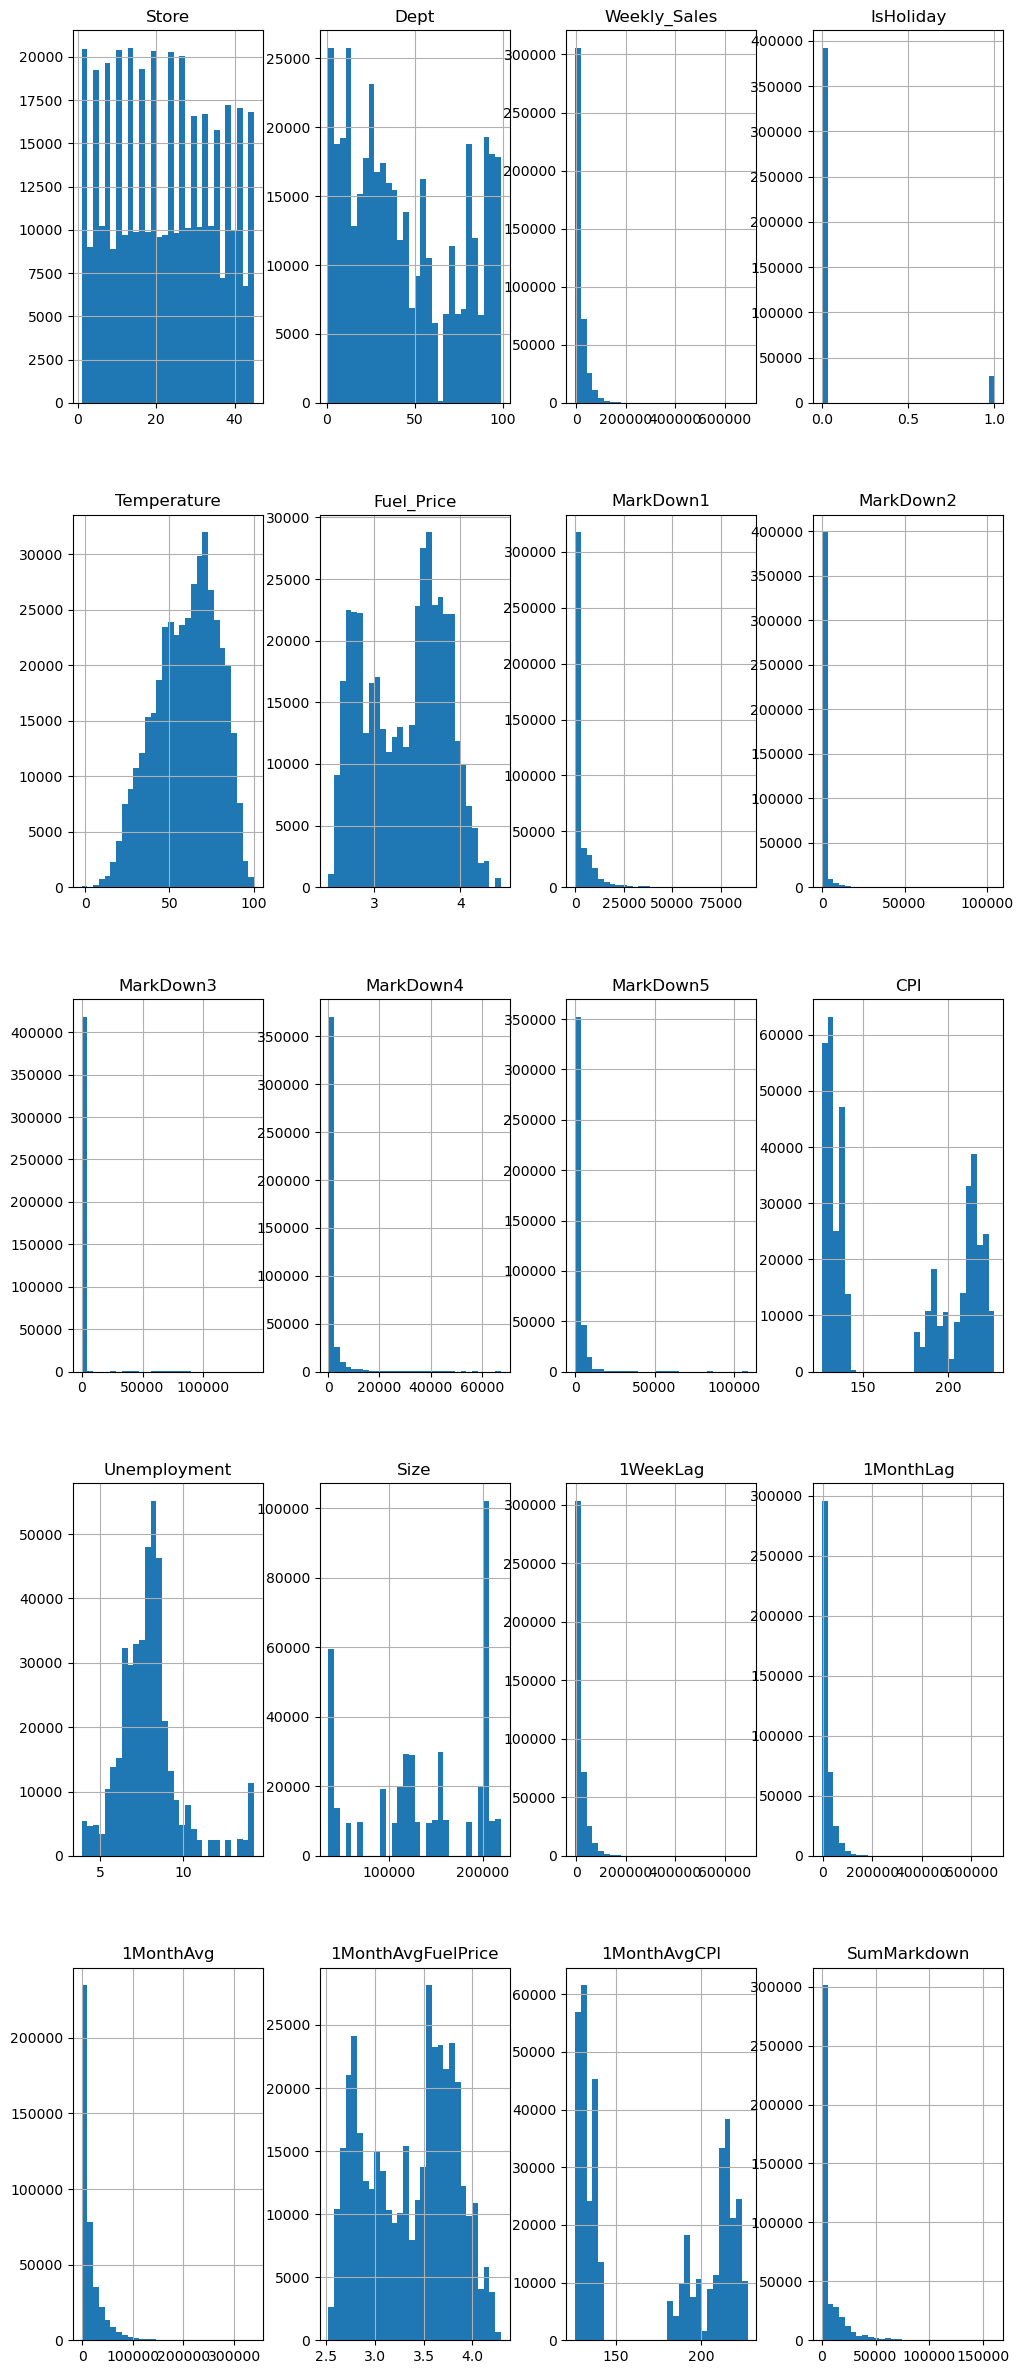

In [52]:
#Data cleaning

training_df.hist(figsize=(12,30),bins=30)
plt.show()

In [54]:
mins = training_df.min()
maxes = training_df.max()

print("Mins \n", mins)


Mins 
 Store                          1
Dept                           1
Date                  2010-02-05
Weekly_Sales            -4988.94
IsHoliday                    0.0
Temperature                -2.06
Fuel_Price                 2.472
MarkDown1                    0.0
MarkDown2                -265.76
MarkDown3                  -29.1
MarkDown4                    0.0
MarkDown5                    0.0
CPI                      126.064
Unemployment               3.879
Type                           A
Size                       34875
1WeekLag                -4988.94
1MonthLag               -4988.94
1MonthAvg                 -989.5
1MonthAvgFuelPrice         2.519
1MonthAvgCPI          126.078847
SumMarkdown                  0.0
dtype: object


In [55]:
print("Maxes \n", maxes)

Maxes 
 Store                          45
Dept                           99
Date                   2012-10-26
Weekly_Sales            693099.36
IsHoliday                     1.0
Temperature                100.14
Fuel_Price                  4.468
MarkDown1                88646.76
MarkDown2               104519.54
MarkDown3               141630.61
MarkDown4                67474.85
MarkDown5               108519.28
CPI                    227.232807
Unemployment               14.313
Type                            C
Size                       219622
1WeekLag                693099.36
1MonthLag               693099.36
1MonthAvg             339472.7575
1MonthAvgFuelPrice         4.2935
1MonthAvgCPI           227.028246
SumMarkdown             160510.61
dtype: object


In [62]:
q_low = training_df["Weekly_Sales"].quantile(0.01)
q_hi = training_df["Weekly_Sales"].quantile(0.99)
training_df["Weekly_Sales"]=training_df["Weekly_Sales"].clip(lower = q_low, upper = q_hi)
q_low = training_df["MarkDown3"].quantile(0.01)
q_hi = training_df["MarkDown3"].quantile(0.99)
training_df["MarkDown3"]=training_df["MarkDown3"].clip(lower = q_low, upper = q_hi)
q_low = training_df["MarkDown2"].quantile(0.01)
q_hi = training_df["MarkDown2"].quantile(0.99)
training_df["MarkDown2"]=training_df["MarkDown2"].clip(lower = q_low, upper = q_hi)

In [63]:

training_df["1WeekLag"] = training_df.groupby(["Store","Dept"])["Weekly_Sales"].shift(1)
training_df["1MonthLag"]=training_df.groupby(["Store","Dept"])["Weekly_Sales"].shift(4)
training_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,1WeekLag,1MonthLag
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,NaN,NaN
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,24924.50,NaN
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,46039.49,NaN
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,41595.55,NaN
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,19403.54,24924.5


In [67]:
training_df["1MonthAvg"]=training_df.groupby(["Store","Dept"])["Weekly_Sales"].transform(lambda x: x.shift(1).rolling(4, min_periods=4).mean())
training_df["1MonthAvgFuelPrice"]=training_df.groupby(["Store","Dept"])["Fuel_Price"].transform(lambda x: x.shift(1).rolling(4, min_periods=4).mean())

training_df["1MonthAvgCPI"]=training_df.groupby(["Store","Dept"])["CPI"].transform(lambda x: x.shift(1).rolling(4, min_periods=4).mean())
training_df["SumMarkdown"]=training_df["MarkDown1"]+training_df["MarkDown2"]+training_df["MarkDown3"]+training_df["MarkDown4"]+training_df["MarkDown5"]
training_df["IsHoliday"]=training_df["IsHoliday"].astype(float)
training_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,1WeekLag,1MonthLag,1MonthAvg,1MonthAvgFuelPrice,1MonthAvgCPI,SumMarkdown
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,0.00,0.00,0.00,...,211.096358,8.106,A,151315,NaN,NaN,NaN,NaN,NaN,0.00
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,0.00,0.00,0.00,...,211.242170,8.106,A,151315,24924.50,NaN,NaN,NaN,NaN,0.00
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,0.00,0.00,0.00,...,211.289143,8.106,A,151315,46039.49,NaN,NaN,NaN,NaN,0.00
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,0.00,0.00,0.00,...,211.319643,8.106,A,151315,41595.55,NaN,NaN,NaN,NaN,0.00
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,0.00,0.00,0.00,...,211.350143,8.106,A,151315,19403.54,24924.50,32990.7700,2.54875,211.236828,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0.0,64.88,3.997,4556.61,20.64,1.50,...,192.013558,8.684,B,118221,467.30,346.04,442.9350,3.94100,191.648878,9468.01
421566,45,98,2012-10-05,628.10,0.0,64.89,3.985,5046.74,0.00,18.82,...,192.170412,8.667,B,118221,508.37,352.44,483.5175,3.97350,191.786947,9659.00
421567,45,98,2012-10-12,1061.02,0.0,54.47,4.000,1956.28,0.00,7.89,...,192.327265,8.667,B,118221,628.10,605.96,552.4325,3.99200,191.935131,6554.03
421568,45,98,2012-10-19,760.01,0.0,56.47,3.969,2004.02,0.00,3.18,...,192.330854,8.667,B,118221,1061.02,467.30,666.1975,4.00500,192.091985,3982.42


In [68]:
# We have our signals as IsHoliday, Temperature, 1MonthAvgCPI, all the markdowns, SumMarkdown,1MonthAvgFuelPrice, 1MonthAvg,1MonthLag, 1WeekLag.

signals = ["IsHoliday", "Temperature", "1MonthAvgCPI", "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5", "SumMarkdown","1MonthAvgFuelPrice", "1MonthAvg","1MonthLag", "1WeekLag"]

In [69]:
correlations = training_df[signals].corr()


<Axes: >

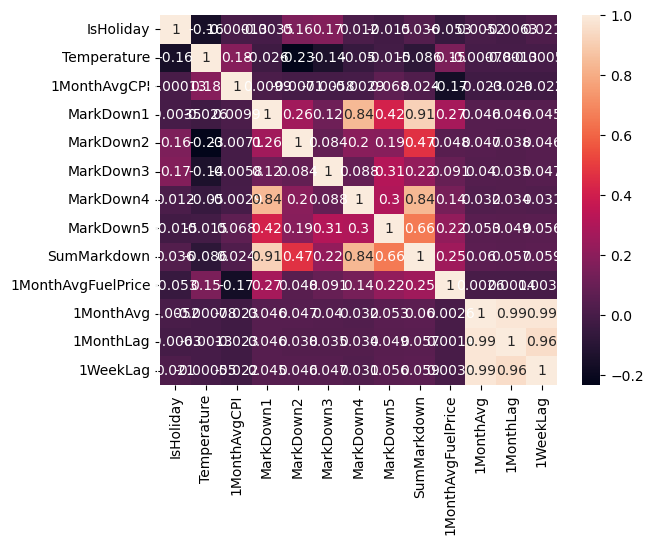

In [70]:
sns.heatmap(correlations,annot=True)

In [72]:
#Feature selection - pick the top 3 to maintain interpretability 

signals = ["IsHoliday", "Temperature", "1MonthAvgCPI", "MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5", "SumMarkdown","1MonthAvgFuelPrice", "1MonthAvg","1MonthLag"]
import statsmodels.api as sm
chosen = []
remaining = signals.copy()

y = training_df["Weekly_Sales"]
for step in range(3):
    best_t=0
    best_var = None
    for var in remaining:
        X= training_df[chosen+[var]].fillna(0)
        
        X=sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        t_stat = abs(model.tvalues[var])
        if t_stat > best_t:
            best_t = t_stat
            best_var = var
    if best_var:
        chosen.append(best_var)
        remaining.remove(best_var)
chosen

['1MonthAvg', '1MonthAvgFuelPrice', '1MonthAvgCPI']

In [77]:
df_store = (training_df.loc[training_df["Store"]==1]).loc[training_df["Dept"]==1]
df_store

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Type,Size,1WeekLag,1MonthLag,1MonthAvg,1MonthAvgFuelPrice,1MonthAvgCPI,SumMarkdown
0,1,1,2010-02-05,24924.50,0.0,42.31,2.572,0.00,0.00,0.00,...,211.096358,8.106,A,151315,NaN,NaN,NaN,NaN,NaN,0.00
1,1,1,2010-02-12,46039.49,1.0,38.51,2.548,0.00,0.00,0.00,...,211.242170,8.106,A,151315,24924.50,NaN,NaN,NaN,NaN,0.00
2,1,1,2010-02-19,41595.55,0.0,39.93,2.514,0.00,0.00,0.00,...,211.289143,8.106,A,151315,46039.49,NaN,NaN,NaN,NaN,0.00
3,1,1,2010-02-26,19403.54,0.0,46.63,2.561,0.00,0.00,0.00,...,211.319643,8.106,A,151315,41595.55,NaN,NaN,NaN,NaN,0.00
4,1,1,2010-03-05,21827.90,0.0,46.50,2.625,0.00,0.00,0.00,...,211.350143,8.106,A,151315,19403.54,24924.50,32990.7700,2.54875,211.236828,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,0.0,76.08,3.666,3666.27,7.64,1.65,...,222.981658,6.908,A,151315,19251.50,16680.24,18467.5825,3.70150,222.527088,9837.80
139,1,1,2012-10-05,21904.47,0.0,68.55,3.617,8077.89,0.00,18.22,...,223.181477,6.573,A,151315,18947.81,18322.37,19034.4750,3.70850,222.696133,15339.68
140,1,1,2012-10-12,22764.01,0.0,62.99,3.601,2086.18,0.00,8.11,...,223.381296,6.573,A,151315,21904.47,19616.22,19930.0000,3.68025,222.881748,8623.10
141,1,1,2012-10-19,24185.27,0.0,67.97,3.594,950.33,0.00,4.93,...,223.425723,6.573,A,151315,22764.01,19251.50,20716.9475,3.65125,223.081568,3348.36


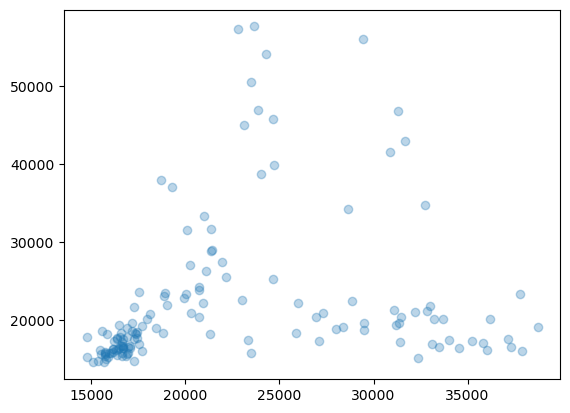

In [82]:
plt.scatter(df_store["1MonthAvg"],df_store["Weekly_Sales"],alpha = 0.3)

In [85]:
training_df['Date'] = pd.to_datetime(training_df['Date'])
training_df = training_df.sort_values(['Store','Dept','Date'])
cutoff = pd.Timestamp('2012-06-01')
train_mask = training_df['Date'] < cutoff
valid_mask = ~train_mask

In [94]:
X_tr, X_va = training_df[train_mask].dropna(), training_df[valid_mask].dropna()

In [95]:
#V1 model:

y = X_tr["Weekly_Sales"]

X=X_tr[["1MonthAvg"]]
X=sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 5.814e+06
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:45:50   Log-Likelihood:            -3.4063e+06
No. Observations:              343400   AIC:                         6.813e+06
Df Residuals:                  343398   BIC:                         6.813e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        248.4251     10.565     23.514      0.0

From the results above, we can see that weekly sales are highly persistent, with the 1-month rolling average explaining ~94% of the variation (R² = 0.94). The coefficient on the rolling average is ~0.98 (p < 0.001), meaning sales track their recent history almost one-for-one. This makes the rolling average a strong baseline predictor, though the low Durbin–Watson statistic signals autocorrelated residuals. Overall, this V1 model confirms strong persistence but provides little insight into underlying drivers such as promotions or holidays.

In [96]:
#V2 add more variables


y = X_tr["Weekly_Sales"]

X=X_tr[["1MonthAvg","1MonthAvgFuelPrice","1MonthAvgCPI"]]
X=sm.add_constant(X)

model = sm.OLS(y,X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.938e+06
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:48:22   Log-Likelihood:            -3.4063e+06
No. Observations:              343400   AIC:                         6.813e+06
Df Residuals:                  343396   BIC:                         6.813e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -52.1094     78

Weekly sales are highly persistent, with the 1-month average explaining most variation (coef ≈ 0.98, R² = 0.94). Fuel prices show a small but significant positive effect, while CPI is insignificant. Residuals remain autocorrelated, and high multicollinearity is present, so results should be interpreted cautiously.